In [34]:
# импорт основных библиотек для работы с датасетом и визуализациями
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
df = pd.read_excel('train.xlsx')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB


датасет состоит из двух колонок - дата и цена. Из даты мы можем получить дополнительные признаки, которые помогут модели дать более точный прогноз, учитывая больше осмысленных данных.
 

In [37]:
import pandas as pd

def add_date_features(df, date_column):
    """
    Добавляет в датафрейм новые столбцы на основе даты: месяц, квартал, день недели.

    Параметры:
    df (pd.DataFrame): Исходный датафрейм.
    date_column (str): Название столбца с датой (тип данных datetime64[ns]).

    Возвращает:
    pd.DataFrame: Датафрейм с добавленными столбцами.
    """
    # Копируем датафрейм, чтобы не изменять исходный
    df = df.copy()

    # Добавляем новые столбцы
    df['month'] = df[date_column].dt.month  # Месяц (1-12)
    df['quarter'] = df[date_column].dt.quarter  # Квартал (1-4)
    df['day_of_week'] = df[date_column].dt.dayofweek  # День недели (0-6, где 0 - понедельник)

    return df

In [38]:
df = add_date_features(df, date_column='dt')
df

,dt,Цена на арматуру,month,quarter,day_of_week
0,2015-01-05,32900,1,1,0
1,2015-01-12,32500,1,1,0
2,2015-01-19,32000,1,1,0
3,2015-01-26,30700,1,1,0
4,2015-02-02,30300,2,1,0
...,...,...,...,...,...
395,2022-08-01,47500,8,3,0
396,2022-08-08,49000,8,3,0
397,2022-08-15,47500,8,3,0
398,2022-08-22,46500,8,3,0


In [39]:
df.describe()

,dt,Цена на арматуру,month,quarter,day_of_week
count,400,400.000000,400.000000,400.000000,400.0
mean,2018-11-01 12:00:00,39229.475000,6.347500,2.455000,0.0
min,2015-01-05 00:00:00,21000.000000,1.000000,1.000000,0.0
25%,2016-12-03 06:00:00,31075.000000,3.000000,1.000000,0.0
50%,2018-11-01 12:00:00,35450.000000,6.000000,2.000000,0.0
75%,2020-09-29 18:00:00,42000.000000,9.000000,3.000000,0.0
max,2022-08-29 00:00:00,79000.000000,12.000000,4.000000,0.0
std,NaN,13407.979668,3.408929,1.107267,0.0


In [40]:
df = df.set_index(['dt'])
df.sort_index(inplace=True)
df.head()

,Цена на арматуру,month,quarter,day_of_week
dt,,,,
2015-01-05,32900,1,1,0
2015-01-12,32500,1,1,0
2015-01-19,32000,1,1,0
2015-01-26,30700,1,1,0
2015-02-02,30300,2,1,0


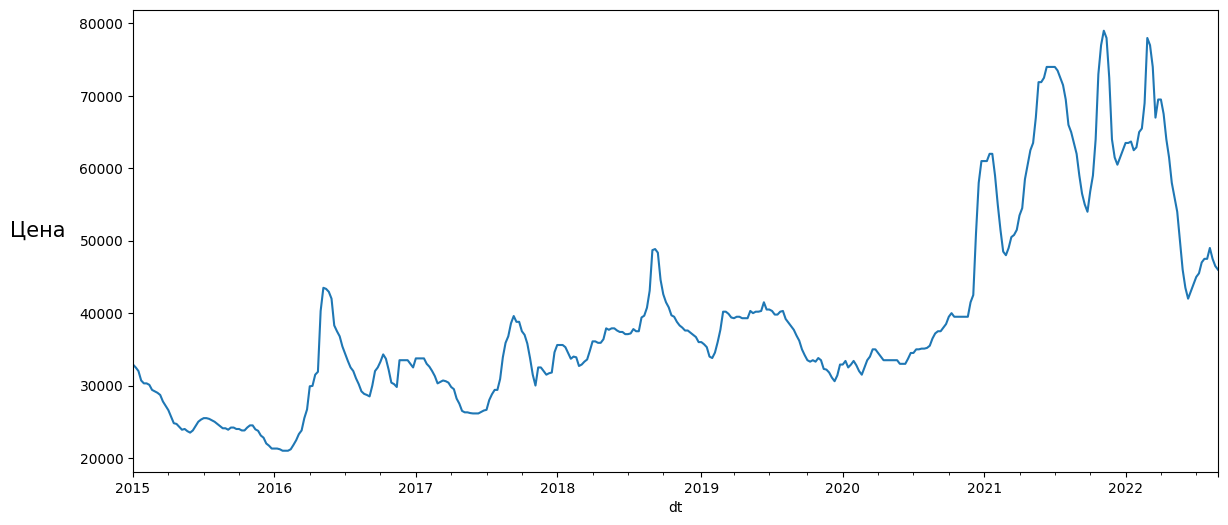

In [41]:
# Рассмотрим изменение цены
plt.figure(figsize=(14, 6))
# plt.title('Time series example')
# plt.xlabel('Date', fontsize=15)
plt.ylabel('Цена', rotation=0, labelpad=30, fontsize=15)
df['Цена на арматуру'].plot();

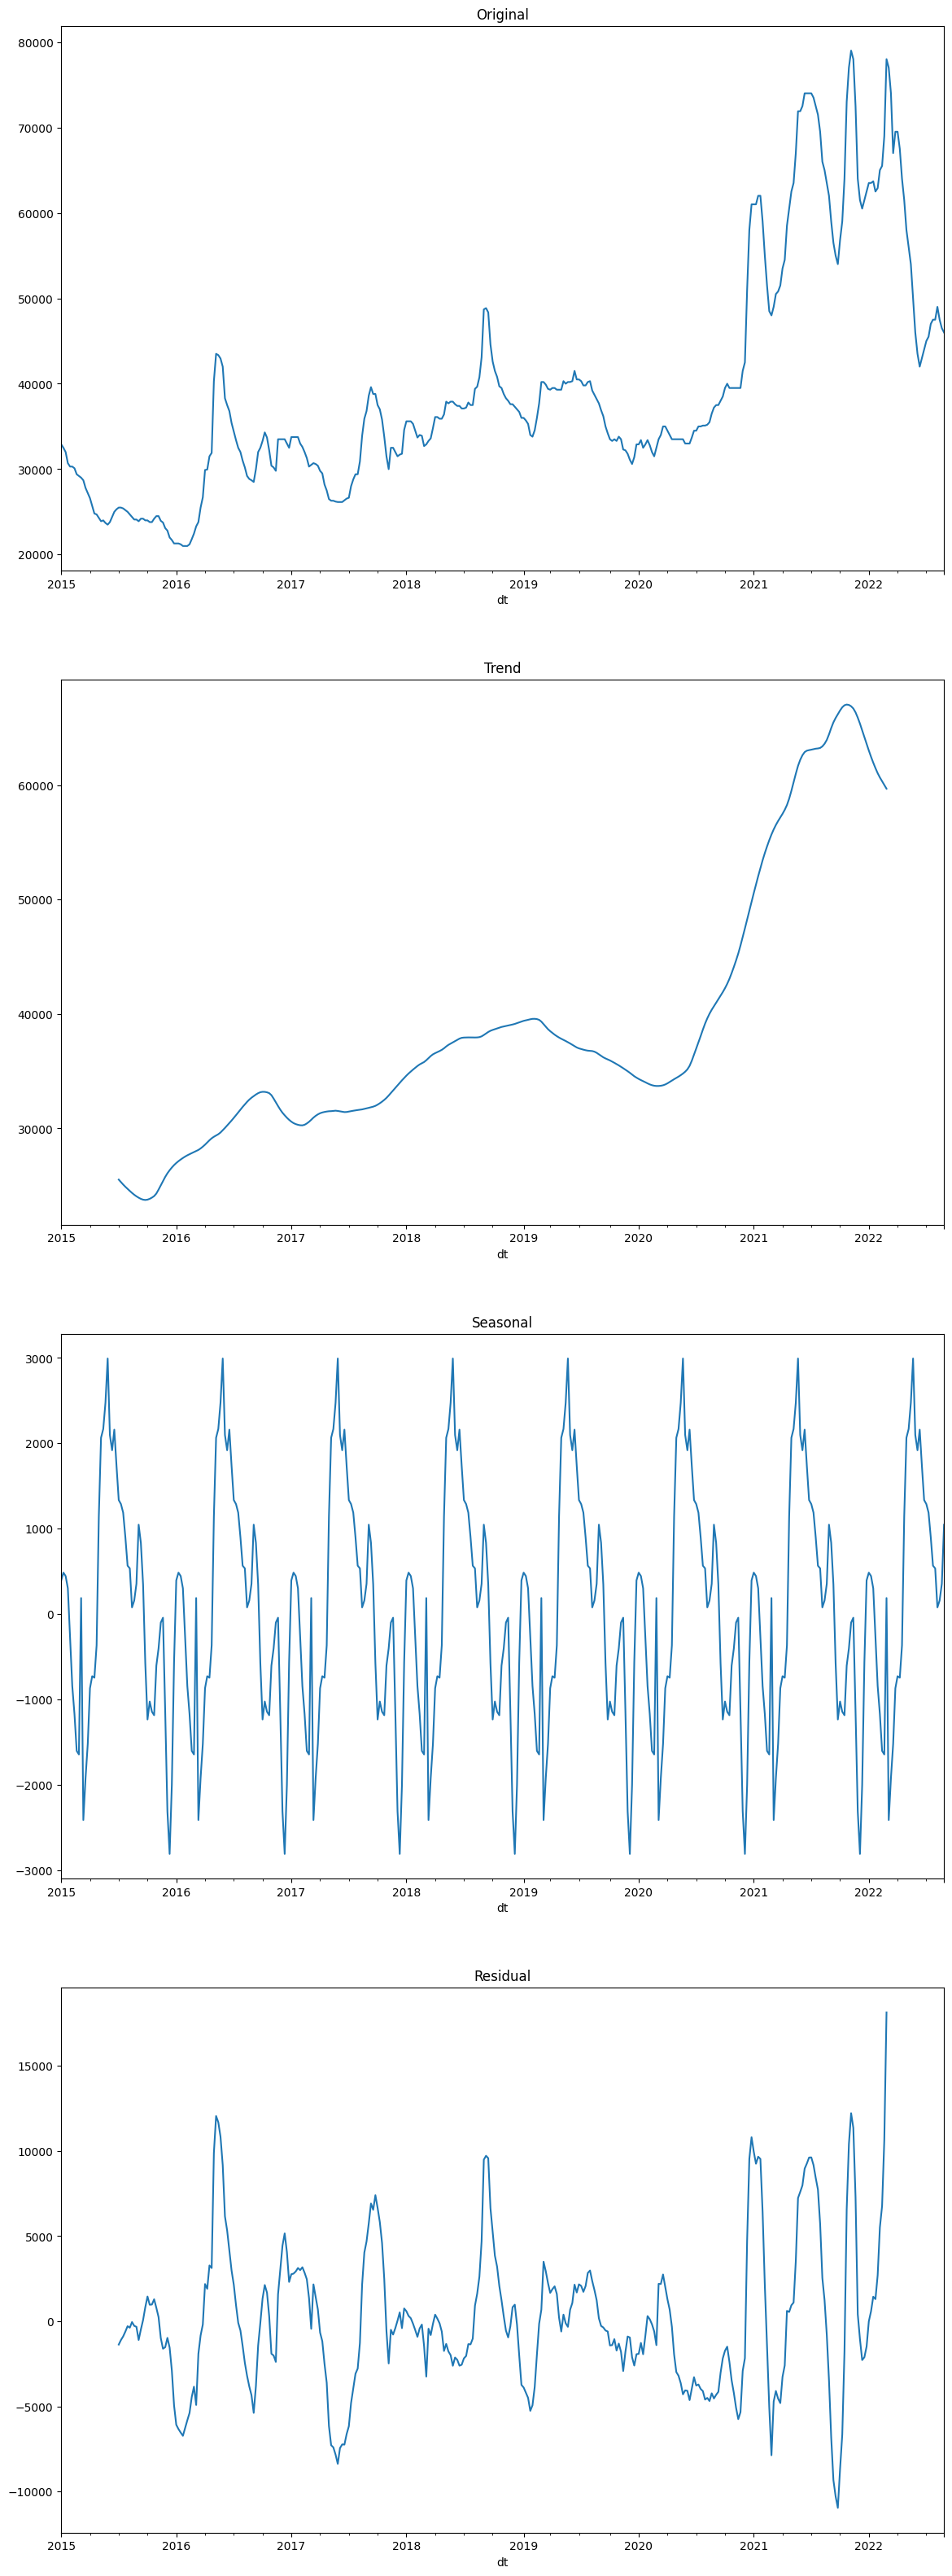

In [42]:
# Разложим ряд на компоненты и проверим ответы на вопросы

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))
decompose = seasonal_decompose(df[['Цена на арматуру']])

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3]);